In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
print("zebra");

zebra


In [30]:
# Creating dummy data
def create_dummy_data(m=2.5, c=3, n=100, seed=(42)):
  np.random.seed(seed);
  true_m = m;
  true_c = c;
  dummy_x_data = np.random.rand(n,1);
  dummy_y_data = true_m*dummy_x_data + true_c;
  dummy_data = np.concatenate((dummy_x_data, dummy_y_data), axis=1);
  print(f"Dummy data created with slope: {m} intercept: {c} and {n} datapoints.")
  plt.plot(dummy_x_data, dummy_y_data);
  plt.xlabel("X");
  plt.ylabel("Y");
  plt.title("Dummy Data");
  plt.show();
  return dummy_data,dummy_x_data,dummy_y_data;


# Train test split function

def train_test_split(dummy_data, train_size=0.8):
  np.random.shuffle(dummy_data);
  train_size = int(train_size*len(dummy_data));
  train_data = dummy_data[:train_size];
  test_data = dummy_data[train_size:];
  return train_data, test_data;


Dummy data created with slope: 2.5 intercept: 3 and 100 datapoints.


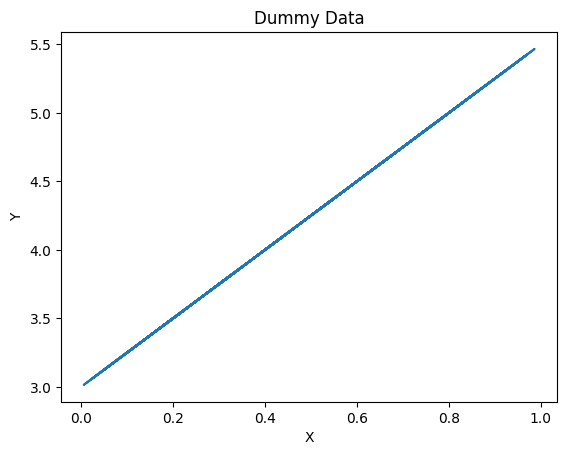

In [33]:
d,x,y=create_dummy_data();

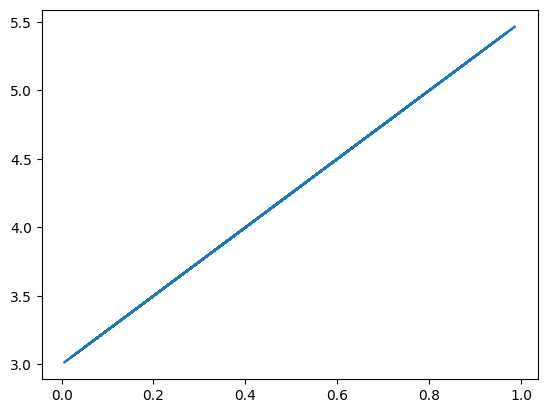

In [34]:
plt.plot(x,y);

In [36]:
# Splitting
train_data, test_data = train_test_split(d);
print(train_data.shape);
print(test_data.shape);

(80, 2)
(20, 2)


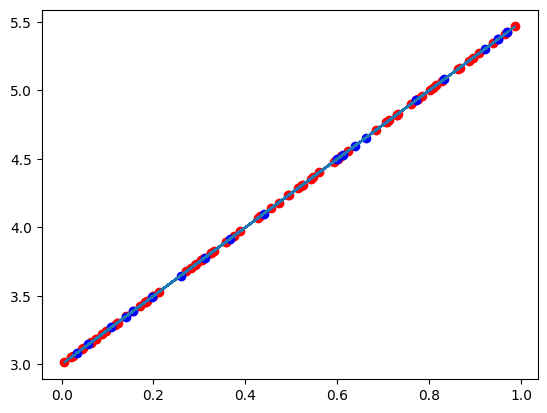

In [38]:
plt.plot(train_data[:,0], train_data[:,1], 'ro');
plt.plot(test_data[:,0], test_data[:,1], 'bo');
plt.plot(x,y);

In [211]:
theta = np.array([0,0]).reshape(2,1);
step_size = 0.01;
OLD_COSTS = [];
X = np.hstack((train_data[:, 0:1], np.ones((train_data.shape[0], 1)))); # Capital X
Y = train_data[:, 1:2] # Capital Y
print(X.shape);
print(Y.shape);
#print(train_data);
Y_pred = np.dot(X, theta);
print(Y_pred.shape);
#print(Y_pred);

(80, 2)
(80, 1)
(80, 1)


In [198]:
# Cost

old_cost = ((1/(len(X)))*((np.transpose(Y_pred-Y))@(Y_pred-Y)))[0][0];
OLD_COSTS.append(old_cost);
print("Old cost:",old_cost);
gradient = (2/len(X))*np.dot(np.transpose(X), (Y_pred-Y));
print(gradient);
print(old_cost);
# Update theta
print(theta);
theta = theta - step_size*gradient;
Y_pred = np.dot(X, theta);
new_cost = ((1/(len(X)))*((np.transpose(Y_pred-Y))@(Y_pred-Y)))[0][0];
print(f"new_cost {new_cost}");
print(theta);

Old cost: 17.806378100389935
[[-4.26683833]
 [-8.31522012]]
17.806378100389935
[[0]
 [0]]
new_cost 17.719136725720308
[[0.00426684]
 [0.00831522]]


In [213]:
OLD_COSTS = []

# initial prediction
Y_pred = X @ theta

# initial cost
new_cost = ((1/len(X)) * ((Y_pred - Y).T @ (Y_pred - Y)))[0][0]

while new_cost > 0.1:
    OLD_COSTS.append(new_cost)

    # gradient
    gradient = (2/len(X)) * (X.T @ (Y_pred - Y))

    # update
    theta = theta - step_size * gradient

    # new prediction
    Y_pred = X @ theta

    # new cost
    new_cost = ((1/len(X)) * ((Y_pred - Y).T @ (Y_pred - Y)))[0][0]

print("Final theta:\n", theta)
print("Cost history:\n", OLD_COSTS)


Final theta:
 [[1.71046911]
 [3.15028308]]
Cost history:
 [np.float64(16.943632187997828), np.float64(16.12280393311449), np.float64(15.341856394775967), np.float64(14.598851615706437), np.float64(13.891945812274413), np.float64(13.219384798189703), np.float64(12.579499630582688), np.float64(11.970702467659306), np.float64(11.391482627650475), np.float64(10.840402839274141), np.float64(10.316095674403513), np.float64(9.81726015408733), np.float64(9.342658519498237), np.float64(8.891113159794665), np.float64(8.461503689271183), np.float64(8.052764166542657), np.float64(7.66388044886028), np.float64(7.293887674992755), np.float64(6.941867870425137), np.float64(6.606947668931392), np.float64(6.288296144865541), np.float64(5.985122750791134), np.float64(5.696675355330196), np.float64(5.422238376361533), np.float64(5.161131004934991), np.float64(4.9127055154933625), np.float64(4.676345658207895), np.float64(4.451465129437154), np.float64(4.2375061165128605), np.float64(4.033937913240872), n

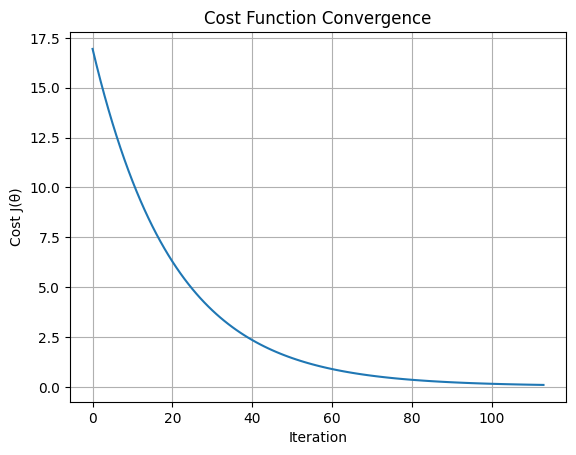

In [215]:
# Convert to numpy array (optional but clean)
costs = np.array(OLD_COSTS)

plt.figure()
plt.plot(range(len(costs)), costs)
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Cost Function Convergence")
plt.grid(True)
plt.show()


(80, 1)


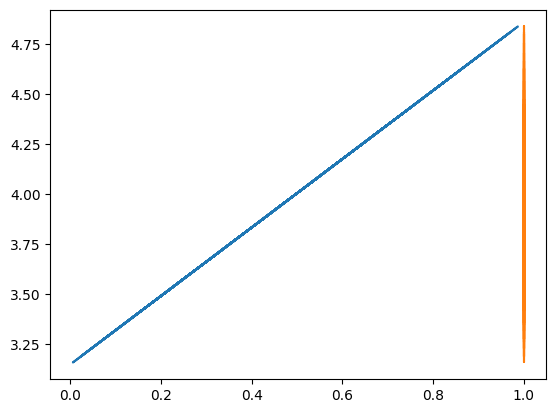

In [223]:
y_pred_final = X @ theta   # shape (n,1)
print(y_pred_final.shape)
plt.plot(X,y_pred_final);
plt.show();